In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
img_height = 256
img_width = 256

# Define new image size
new_height = 128
new_width = 128

In [28]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/tomato',
    shuffle=True,
    image_size=(256,256),
    batch_size=64


)

Found 16011 files belonging to 10 classes.


In [26]:
dataset = dataset.map(lambda x, y: (tf.image.resize(x, (new_height, new_width)), y))

In [29]:
class_names=dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

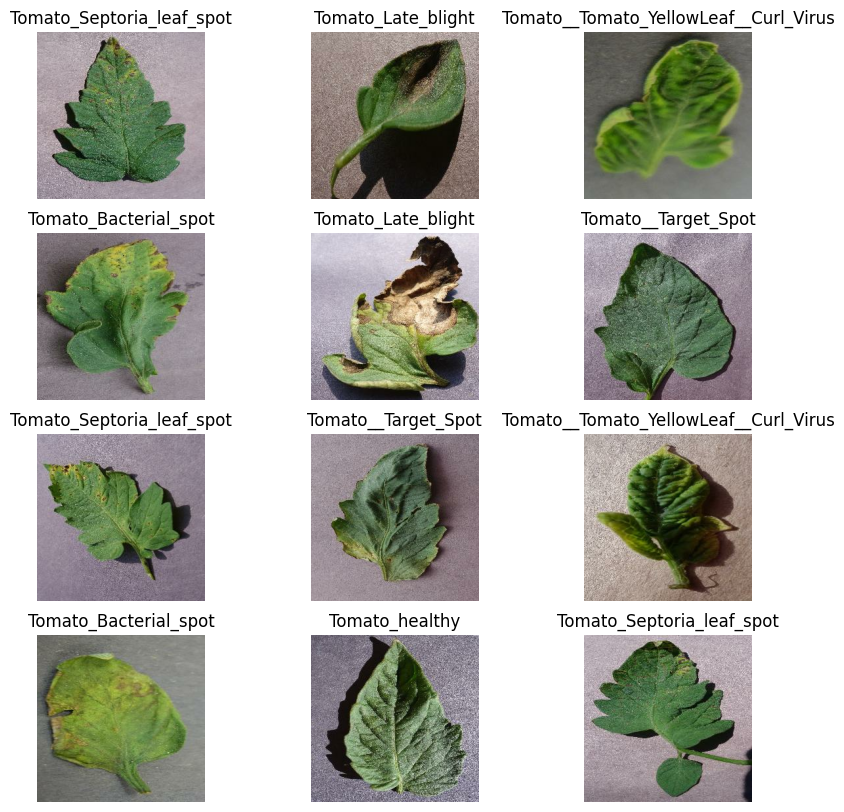

In [7]:
for image_batch,label_batch in dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(12):
        a=plt.subplot(4,3,i+1)
        
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [52]:
def splitting_dataset(ds, train_split=0.8,val_split=0.1,test_split=0.1 ):
    train_size=int((len(ds))*train_split)
    val_size=int((len(ds))*val_split)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [53]:
train_ds, val_ds, test_ds=splitting_dataset(dataset)

In [76]:
len(test_ds)

26

In [74]:
train2,val2,test2=splitting_dataset(dataset)

In [72]:
test_ds2 = test_ds

In [54]:
len(train_ds)

200

In [55]:
a=test_ds.element_spec[0].shape
a

TensorShape([None, 256, 256, 3])

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

In [34]:
input_shape = (256, 256, 3)

# Load the pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

In [35]:
base_model

In [36]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [37]:
# Add custom classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax')(x)

In [38]:
output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>

In [39]:
num_classes = 10 # number of classes in your dataset
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

In [40]:
model = models.Model(inputs=base_model.input, outputs=output)


In [41]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
input_shape = (128, 128, 3)

# Load the pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [44]:
# Add custom classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax')(x)
num_classes = 10 # number of classes in your dataset

In [45]:
# Resize the images
def resize_image(image, label):
  image = tf.image.resize(image, (128, 128))
  return image, label


In [46]:
train_ds = train_ds.map(resize_image)
val_ds = val_ds.map(resize_image)

In [47]:
model = models.Model(inputs=base_model.input, outputs=output)

In [48]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
200/200 [==============================] - 1239s 6s/step - loss: 1.4533 - accuracy: 0.5947 - val_loss: 0.6101 - val_accuracy: 0.8012
Epoch 2/10
200/200 [==============================] - 58s 286ms/step - loss: 0.7443 - accuracy: 0.7513 - val_loss: 0.4317 - val_accuracy: 0.8612
Epoch 3/10
200/200 [==============================] - 71s 353ms/step - loss: 0.6070 - accuracy: 0.7948 - val_loss: 0.4163 - val_accuracy: 0.8694
Epoch 4/10
200/200 [==============================] - 72s 355ms/step - loss: 0.5241 - accuracy: 0.8272 - val_loss: 0.3390 - val_accuracy: 0.8806
Epoch 5/10
200/200 [==============================] - 59s 289ms/step - loss: 0.4816 - accuracy: 0.8371 - val_loss: 0.3411 - val_accuracy: 0.8944
Epoch 6/10
200/200 [==============================] - 58s 286ms/step - loss: 0.4370 - accuracy: 0.8484 - val_loss: 0.2984 - val_accuracy: 0.8919
Epoch 7/10
200/200 [==============================] - 58s 286ms/step - loss: 0.4252 - accuracy: 0.8552 - val_loss: 0.3071 - val_acc

In [58]:
#test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, (128, 128)), y))
test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))



In [59]:
test_ds=test_ds.map(resize_image)

In [60]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)


26/26 [==============================] - 121s 4s/step - loss: 0.3177 - accuracy: 0.8908
Test accuracy: 0.8907510638237


In [62]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [65]:
import numpy as np

In [68]:
class_names[6]

'Tomato__Target_Spot'

In [70]:
for images, labels in test_ds.take(1):
  print(type(labels))

<class 'tensorflow.python.framework.ops.EagerTensor'>


1/1 [==============================] - 0s 47ms/step


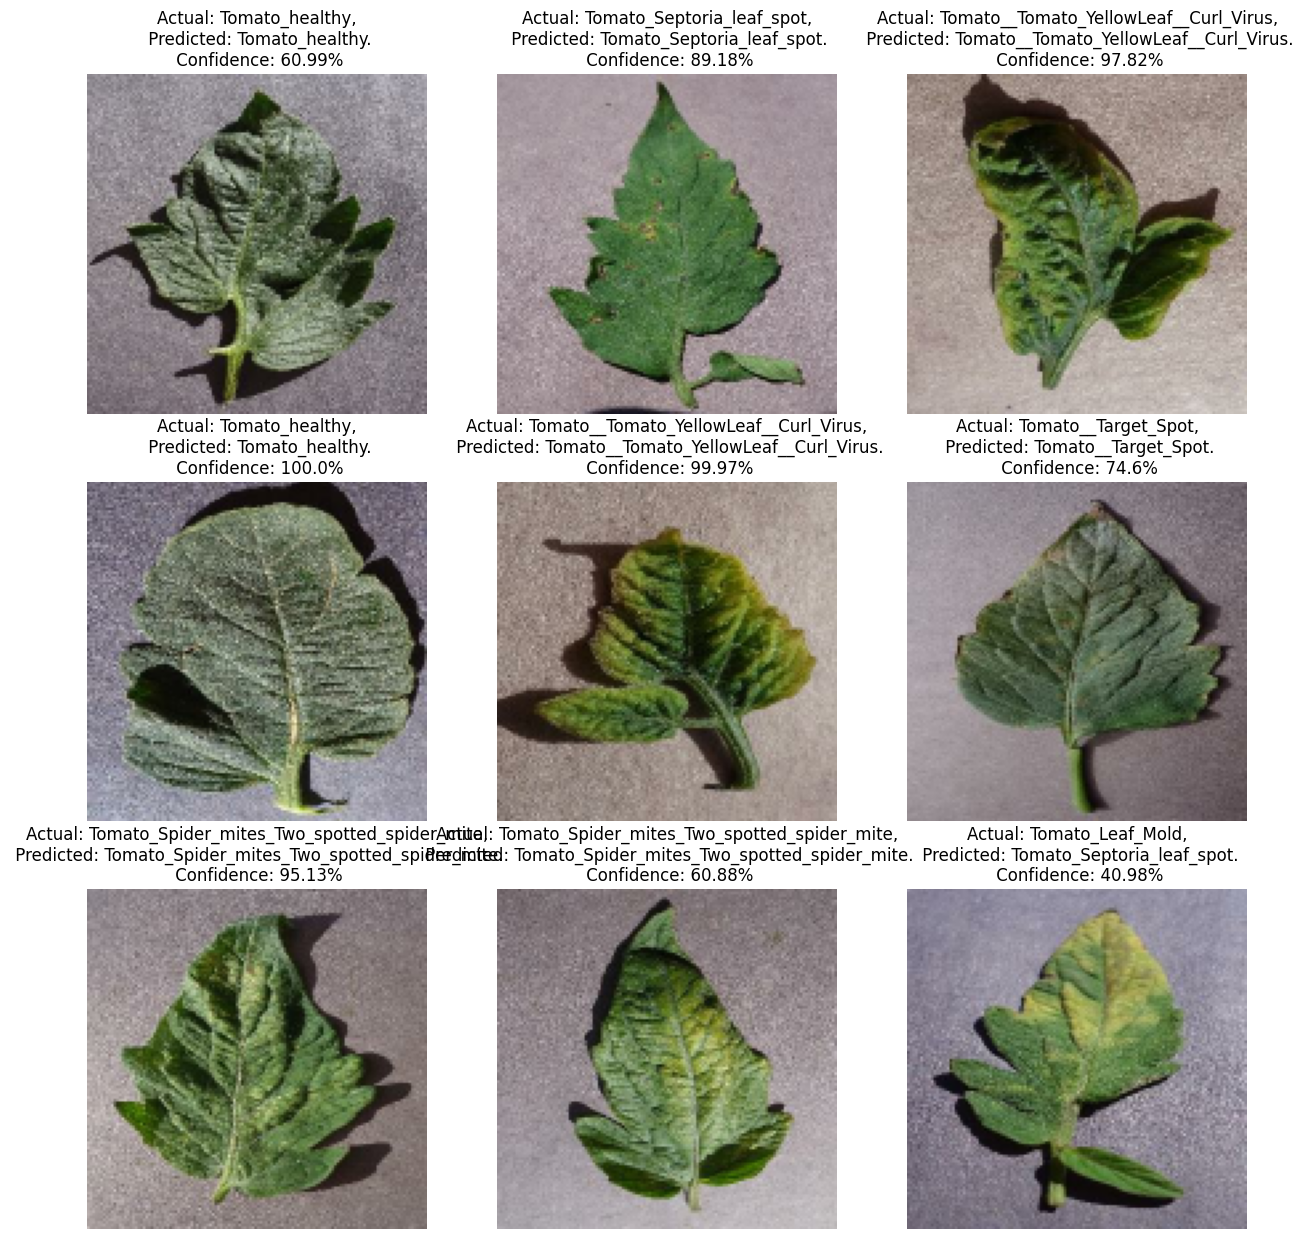

In [81]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[tf.argmax(labels[i], axis=-1)] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
